## Chapter 3

In [13]:
from matplotlib.patches import FancyArrow
import mpl_toolkits.mplot3d.art3d as art3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.gridspec as gridspec
from numpy import *
from matplotlib.pyplot import *

In [10]:
def dftmatrix(Nfft=32,N=None):
    #construct DFT matrix’
    k= arange(Nfft)
    if N is None: N = Nfft
    n = arange(N)
    U = matrix(exp(1j* 2*pi/Nfft *k*n[:,None])) # use numpy broadcasting to create matrix 
    return U/sqrt(Nfft)

Text(0.5,0,'n')

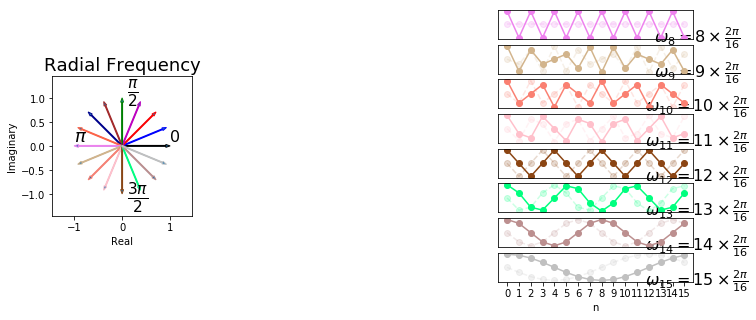

In [14]:
Nfft=16
v = np.ones((16,1))
U = dftmatrix(Nfft=Nfft,N=16)
# ---
# hardcoded constants to format complicated figure

gs = gridspec.GridSpec(8,12)
gs.update( wspace=1, left=0.01)

fig =figure(figsize=(10,5))
ax0 = subplot(gs[:,:3])
fig.add_subplot(ax0)

ax0.set_aspect(1)
a=2*pi/Nfft*arange(Nfft)

colors = ['k','b','r','m','g','Brown','DarkBlue','Tomato','Violet', 'Tan',
'Salmon','Pink','SaddleBrown', 'SpringGreen', 'RosyBrown','Silver',]

for j,i in enumerate(a):
    ax0.add_patch(FancyArrow(0,0,cos(i),sin(i),width=0.02, length_includes_head=True,edgecolor=colors[j]))

ax0.text(1,0.1,'0',fontsize=16)
ax0.text(0.1,1,r'$\frac{\pi}{2}$',fontsize=22)
ax0.text(-1,0.1,r'$\pi$',fontsize=18)
ax0.text(0.1,-1.2,r'$\frac{3\pi}{2}$',fontsize=22)
ax0.axis(array([-1,1,-1,1])*1.45)
ax0.set_title('Radial Frequency',fontsize=18)
ax0.set_xlabel('Real')
ax0.set_ylabel('Imaginary')

# plots in the far right column
for i in range(8):
    ax=subplot(gs[i,8:])
    ax.set_xticks([]); ax.set_yticks([])
    ax.set_ylabel(r'$\omega_{%d}=%d\times\frac{2\pi}{16}$'%(i+8,i+8),fontsize=16,rotation='horizontal')
    ax.plot(U.real[:,i+8],'-o',color=colors[i+8])
    ax.plot(U.imag[:,i+8],'--o',color=colors[i+8],alpha=0.2)
    ax.axis(ymax=4/Nfft*1.1,ymin=-4/Nfft*1.1)
    ax.yaxis.set_label_position('right')

ax.set_xticks(arange(16))
ax.set_xlabel('n')